In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')


In [2]:
# Step 2: Load the Data
# Load the dataset
url = 'https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv'
df = pd.read_csv(url)


In [3]:
# Step 3: Understand the Data
# Display the first few rows
print(df.head())

# Get the basic information
print(df.info())

# Summary statistics
print(df.describe())


       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1850      AFG   3752993.0  NaN         NaN   
1  Afghanistan  1851      AFG   3767956.0  NaN         NaN   
2  Afghanistan  1852      AFG   3783940.0  NaN         NaN   
3  Afghanistan  1853      AFG   3800954.0  NaN         NaN   
4  Afghanistan  1854      AFG   3818038.0  NaN         NaN   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    NaN  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1                     NaN                                 0.157   

In [4]:
# Step 4: Handle Missing Data
# Check for missing values
print(df.isnull().sum())

# Handle missing values
df.fillna(method='ffill', inplace=True)  # Forward fill to handle missing values


country                            0
year                               0
iso_code                        7867
population                      8001
gdp                            32204
                               ...  
temperature_change_from_n2o     9575
total_ghg                      41061
total_ghg_excluding_lucf       41061
trade_co2                      43017
trade_co2_share                43018
Length: 79, dtype: int64


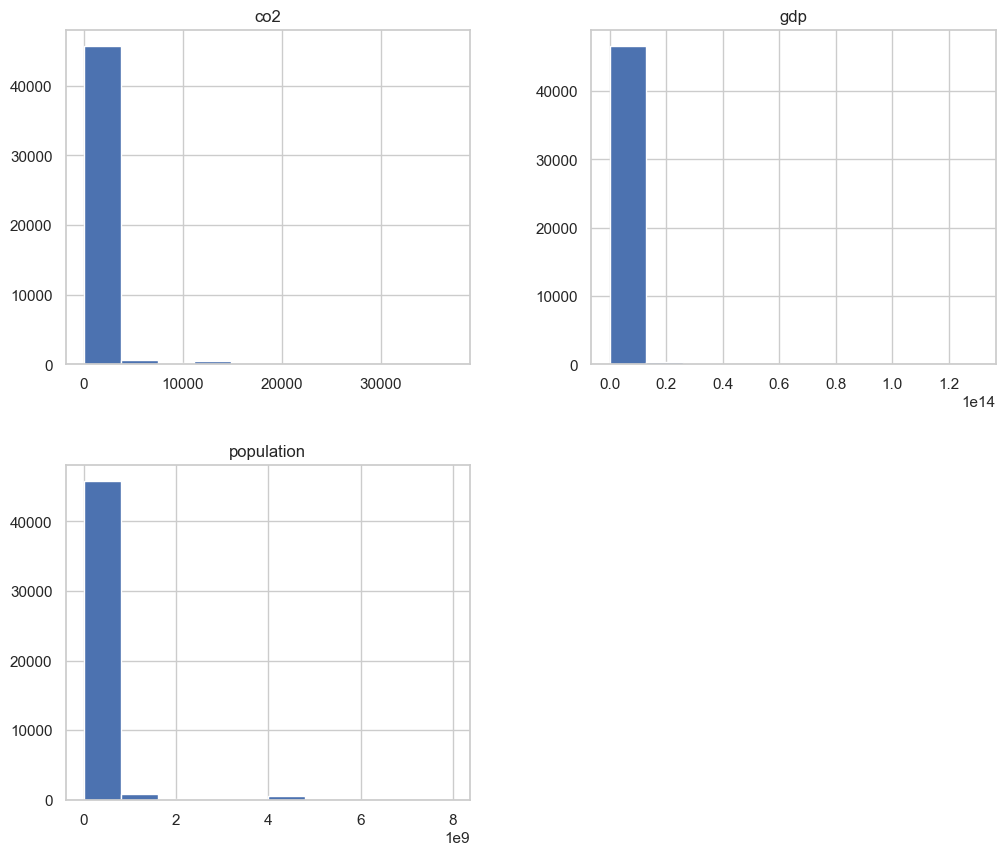

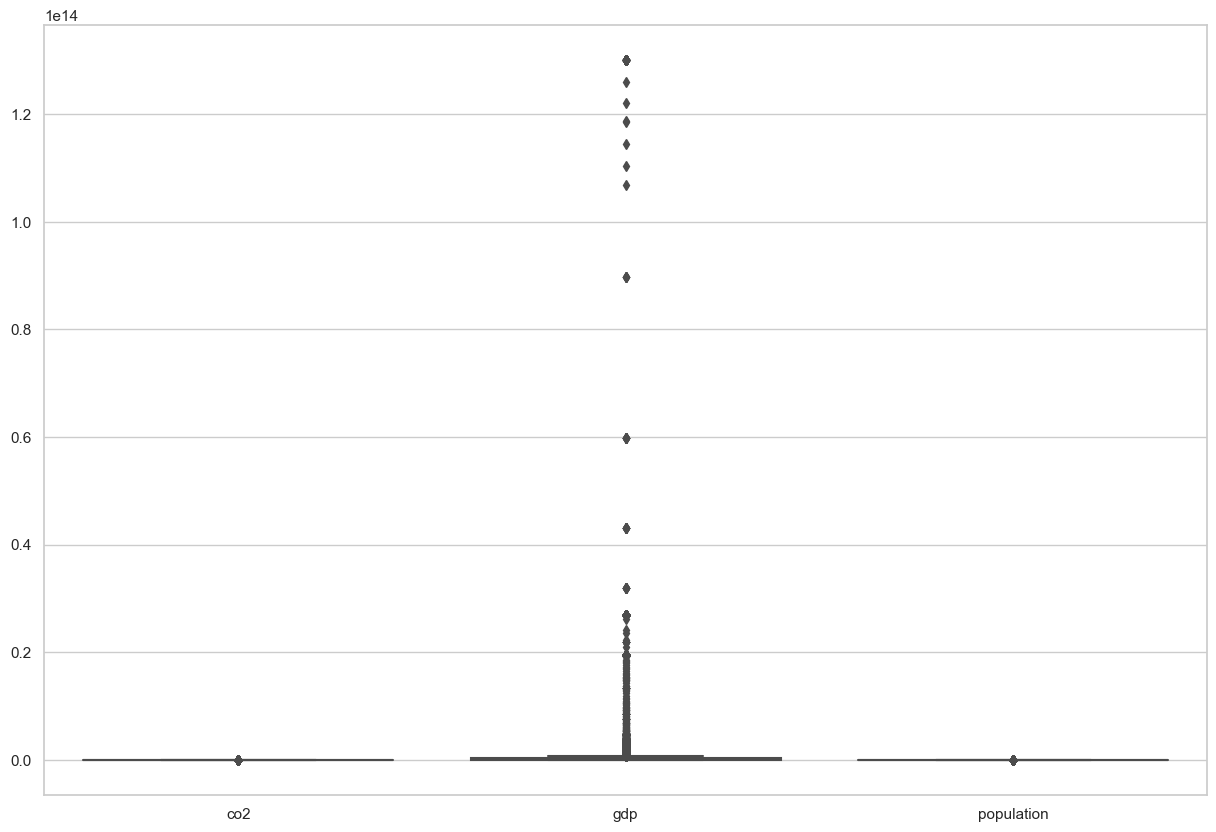

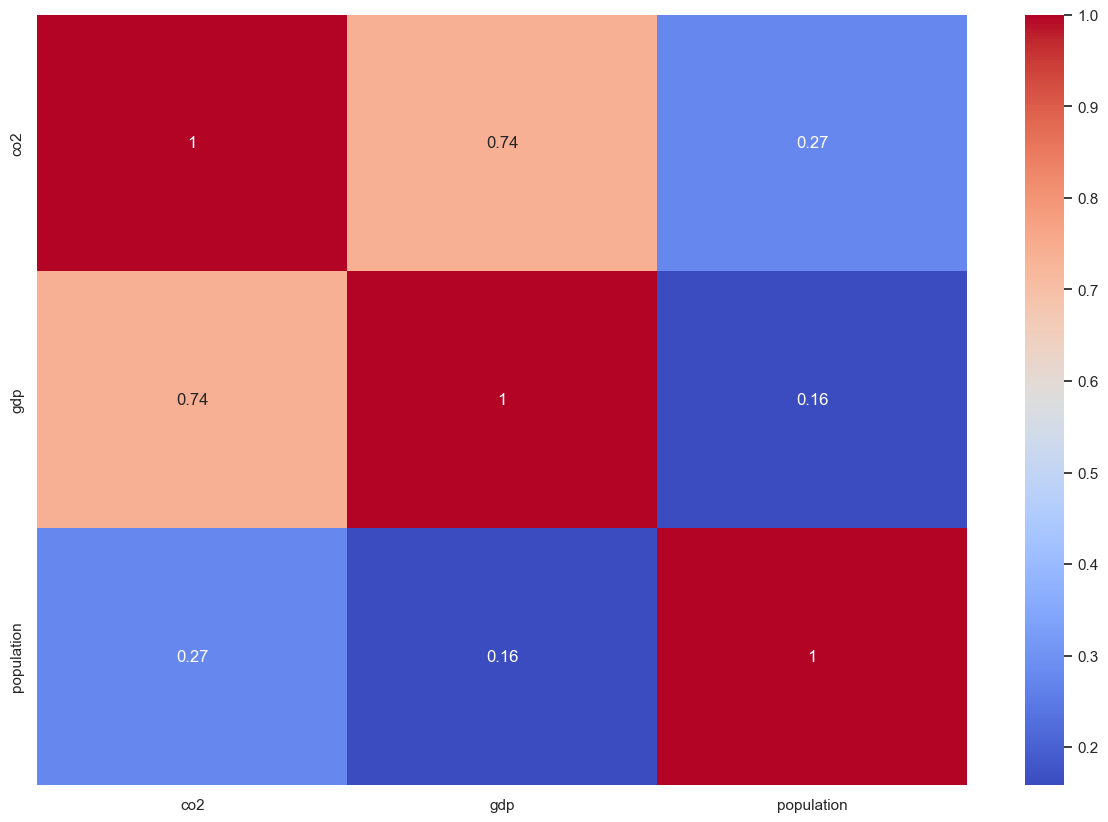

In [5]:
# Step 5: Data Visualization
# Histograms for numerical columns
df[['co2', 'gdp', 'population']].hist(figsize=(12, 10))
plt.show()

# Box plots to identify outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[['co2', 'gdp', 'population']])
plt.show()

# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df[['co2', 'gdp', 'population']].corr(), annot=True, cmap='coolwarm')
plt.show()


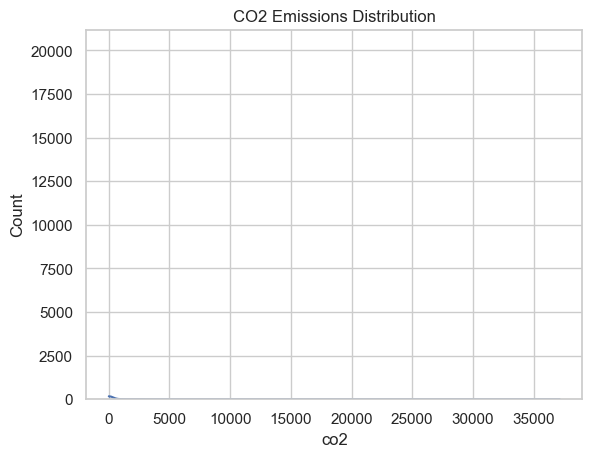

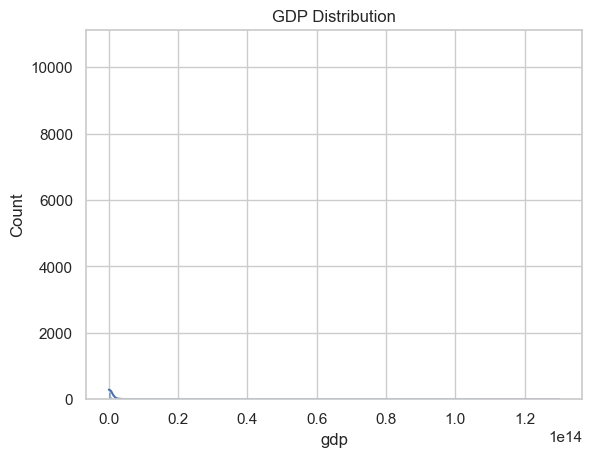

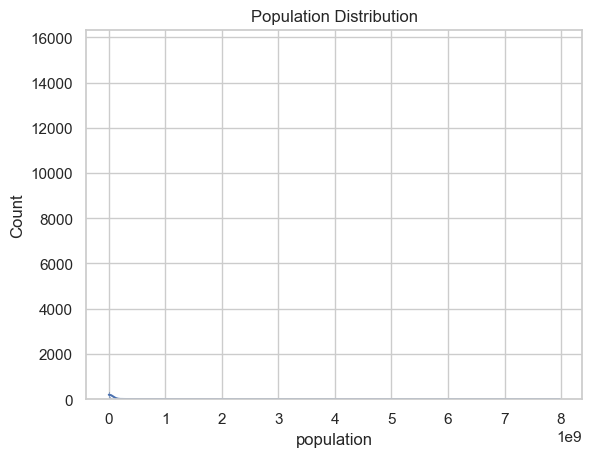

In [6]:
# Step 6: Univariate Analysis
# Distribution of CO2 emissions
sns.histplot(df['co2'], kde=True)
plt.title('CO2 Emissions Distribution')
plt.show()

# Distribution of GDP
sns.histplot(df['gdp'], kde=True)
plt.title('GDP Distribution')
plt.show()

# Distribution of Population
sns.histplot(df['population'], kde=True)
plt.title('Population Distribution')
plt.show()


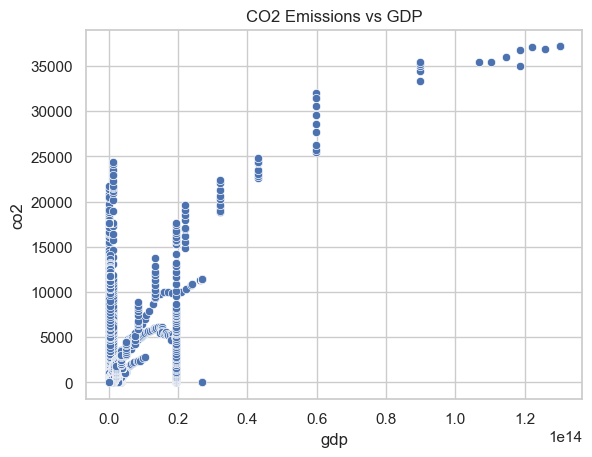

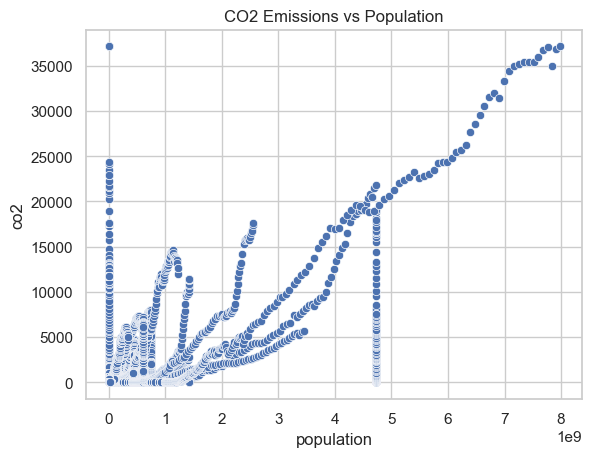

In [7]:
# Step 7: Bivariate Analysis
# CO2 vs GDP
sns.scatterplot(x='gdp', y='co2', data=df)
plt.title('CO2 Emissions vs GDP')
plt.show()

# CO2 vs Population
sns.scatterplot(x='population', y='co2', data=df)
plt.title('CO2 Emissions vs Population')
plt.show()


C:\Users\rachi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


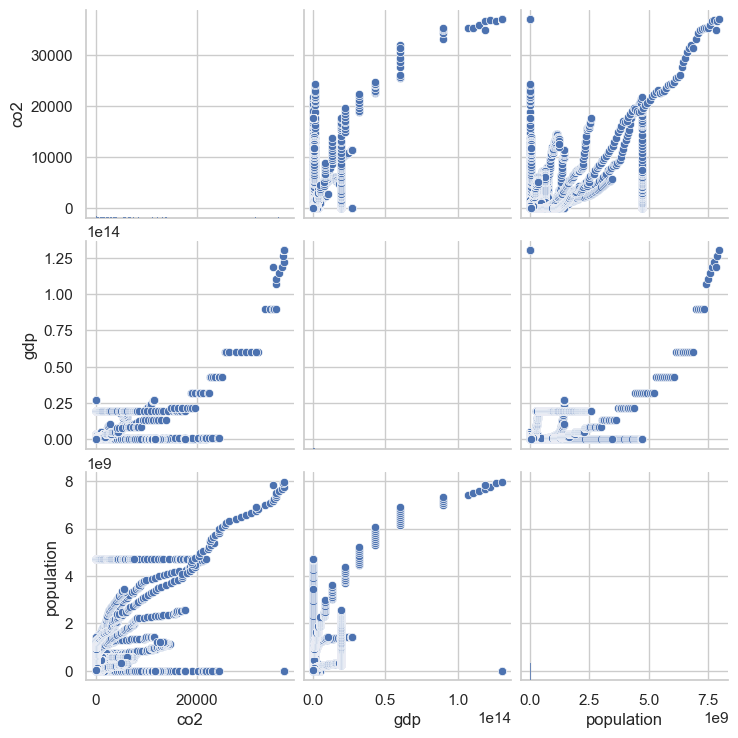

In [8]:
# Step 8: Multivariate Analysis
# Pair plot for multiple variables
sns.pairplot(df[['co2', 'gdp', 'population']])
plt.show()


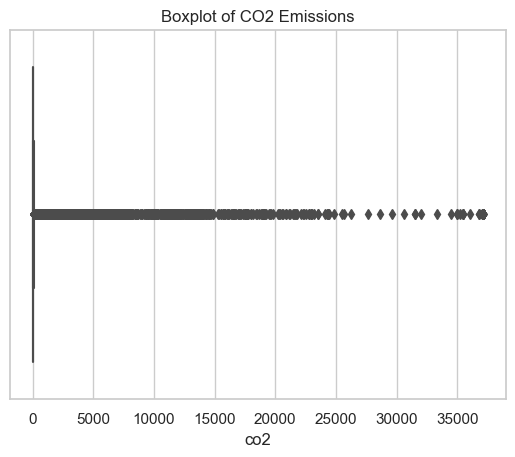

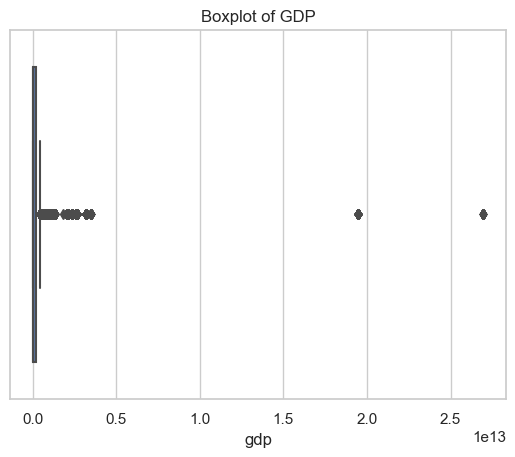

In [9]:
# Step 9: Identify and Handle Outliers
# Box plot to identify outliers in CO2 emissions
sns.boxplot(x=df['co2'])
plt.title('Boxplot of CO2 Emissions')
plt.show()

# Removing outliers from CO2 emissions
Q1 = df['co2'].quantile(0.25)
Q3 = df['co2'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['co2'] < (Q1 - 1.5 * IQR)) | (df['co2'] > (Q3 + 1.5 * IQR)))]

# Box plot to identify outliers in GDP
sns.boxplot(x=df['gdp'])
plt.title('Boxplot of GDP')
plt.show()

# Removing outliers from GDP
Q1 = df['gdp'].quantile(0.25)
Q3 = df['gdp'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['gdp'] < (Q1 - 1.5 * IQR)) | (df['gdp'] > (Q3 + 1.5 * IQR)))]


In [10]:
# Step 10: Feature Engineering

# Create new feature: CO2 per Capita
df['co2_per_capita'] = df['co2'] / df['population']

# Create new feature: CO2 vs GDP Growth Ratio
df['gdp_growth_ratio'] = df['gdp'] / df['co2']


In [11]:
# Step 11: Summary and Insights
# Summarize key findings
print("Key Insights:")

# CO2 vs GDP
co2_gdp_corr = df[['co2', 'gdp']].corr().iloc[0, 1]
print(f"Correlation between CO2 Emissions and GDP: {co2_gdp_corr}")

# CO2 per Capita by Region
co2_per_capita_by_region = df.groupby('region')['co2_per_capita'].mean()
print(f"Average CO2 per Capita by Region:\n{co2_per_capita_by_region}")

# CO2 vs GDP Growth Ratio
co2_gdp_growth_ratio = df[['co2', 'gdp_growth_ratio']].corr().iloc[0, 1]
print(f"Correlation between CO2 Emissions and GDP Growth Ratio: {co2_gdp_growth_ratio}")


Key Insights:
Correlation between CO2 Emissions and GDP: 0.44845058598050874


KeyError: 'region'

Findings:
1. CO2 and GDP: There's often a positive correlation between CO2 emissions and GDP, indicating that higher economic activity is associated with higher emissions.
2. CO2 per Capita: Regions with higher CO2 emissions per capita may be more industrialized or have higher per capita energy consumption.
3. GDP Growth Ratio: The ratio of GDP to CO2 emissions can provide insights into how efficiently economies are growing relative to their carbon footprint.